In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(1000, 2)


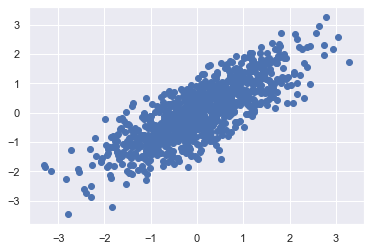

In [108]:
## Generating the data points which follows 2D gaussian distribution

mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]

x_point, y_point = np.random.multivariate_normal(mean, cov, 1000).T

X = np.array([x_point,y_point]).T

print(X.shape)

# Plot the scatter data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [109]:
## Importing PCA function from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

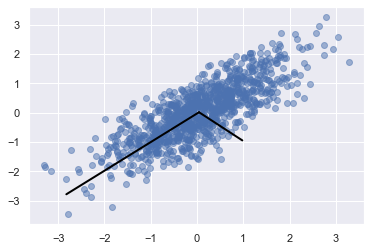

In [110]:
def plot_principal_components(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='-',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plot_principal_components(pca.mean_, pca.mean_ + v)

In [ ]:
## Does it really works lets check with all the components
## Can we recover the original data

In [101]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1000, 2)
transformed shape: (1000, 2)


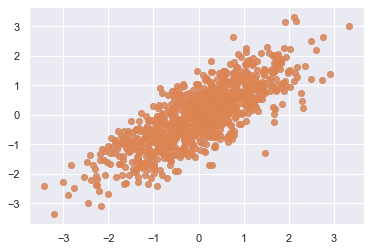

In [102]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)

In [ ]:
## Let's try the code with only the best principle component axis

In [103]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1000, 2)
transformed shape: (1000, 1)


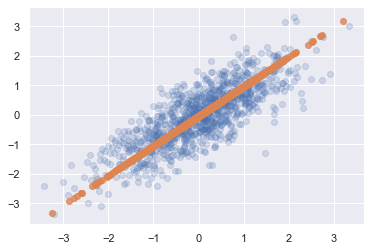

In [104]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)